## Capstone 1
### By Priya Sharma
### PGA 23

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("Cleaned_Makaan.com_Data.csv")
df.head()

,Title,Location,Area,Status,Price,Year,Bathroom,District
0,4 BHK Independent Floor,"Neeti Bagh, Delhi",2925.0,Ready to move,8.50,NaN,NaN,South/West/Central Delhi
1,1 BHK Apartment,"Khera Khurd, Delhi",450.0,Ready to move,9.50,NaN,NaN,South/West/Central Delhi
2,3 BHK Independent Floor,"Paschim Vihar, Delhi",1620.0,Ready to move,2.35,NaN,NaN,South/West/Central Delhi
3,3 BHK Independent Floor,"Paschim Vihar, Delhi",1620.0,Ready to move,2.40,NaN,NaN,South/West/Central Delhi
4,4 BHK Independent Floor,"Paschim Vihar, Delhi",2250.0,Ready to move,2.35,NaN,NaN,South/West/Central Delhi


In [3]:
df.shape

(1200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1180 non-null   object 
 1   Location  520 non-null    object 
 2   Area      1160 non-null   float64
 3   Status    1180 non-null   object 
 4   Price     1200 non-null   float64
 5   Year      20 non-null     object 
 6   Bathroom  340 non-null    object 
 7   District  1200 non-null   object 
dtypes: float64(2), object(6)
memory usage: 75.1+ KB


### Duplicate Values Check

In [5]:
df.duplicated().sum()

84

### Dropping Duplicate Rows

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.shape

(1116, 8)

### Null Value Check

In [8]:
df.isnull().sum()

Title         20
Location     623
Area          39
Status        20
Price          0
Year        1096
Bathroom     782
District       0
dtype: int64

### Dropping Columns with more than 40% Null Values 

In [9]:
df.drop(columns=["Location","Year","Bathroom"],inplace=True)
df.isnull().sum()

Title       20
Area        39
Status      20
Price        0
District     0
dtype: int64

In [10]:
df.dtypes

Title        object
Area        float64
Status       object
Price       float64
District     object
dtype: object

### Imputing Null Values

In [11]:
df["Title"]=df["Title"].fillna(df["Title"].mode()[0])
df["Area"]=df["Area"].fillna(df["Area"].mean())
df["Status"]=df["Status"].fillna(df["Status"].mode()[0])

In [12]:
df.isnull().sum()

Title       0
Area        0
Status      0
Price       0
District    0
dtype: int64

### Value Count of Object data type

In [13]:
df["Title"].value_counts()

3 BHK Apartment             316
3 BHK Independent Floor     207
2 BHK Independent Floor     152
2 BHK Apartment             130
4 BHK Apartment             109
4 BHK Independent Floor      84
1 BHK Apartment              29
1 BHK Independent Floor      26
Residential Plot             23
3 BHK Independent House       8
5 BHK Apartment               7
2 BHK Independent House       5
5 BHK Independent Floor       4
1 BHK Independent House       4
1 RK Studio Apartment         3
7 BHK Independent House       2
1 BHK Apartment               1
4 BHK Villa                   1
9 BHK Independent House       1
10 BHK Independent House      1
6 BHK Independent House       1
4 BHK Independent             1
8 BHK Apartment               1
Name: Title, dtype: int64

In [14]:
df["Status"].value_counts()

Ready to move         1000
Under Construction      93
Resale                  16
New                      7
Name: Status, dtype: int64

In [15]:
df["District"].value_counts()

South/West/Central Delhi    717
South-West Delhi            399
Name: District, dtype: int64

In [16]:
df.shape

(1116, 5)

In [17]:
cat_cols=df.dtypes[df.dtypes=="object"].index
cat_cols

Index(['Title', 'Status', 'District'], dtype='object')

In [18]:
num_cols=df.dtypes[df.dtypes!="object"].index
num_cols

Index(['Area', 'Price'], dtype='object')

### Bivariate Analysis

#### Inferences : 
* There is no linear relationship between Area and Price, inconclusive.
* 'Ready to move' category is in majority while 'New' category is in minority.

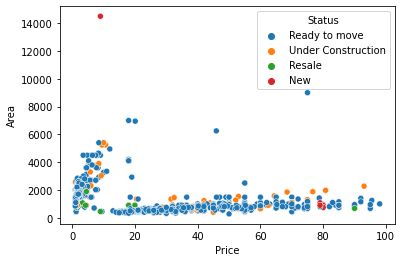

In [62]:
sns.scatterplot(data=df,y="Area",x="Price",hue="Status")
plt.rc('ytick', labelsize=7)
plt.show()

#### Inferences : 
* 'New' category is least priced(In Lakhs).
* 'Ready to move' and 'Resale' categories are highly priced(In Crores).
* 'Under Construction' category is moderately priced.

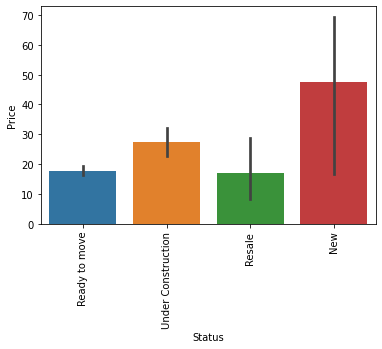

In [20]:
sns.barplot(data=df,y="Price", x="Status")
plt.rc('ytick', labelsize=2)
plt.xticks(rotation=90)
plt.show()

#### Inferences :
* South/West/Central Delhi are the most expensive districts in terms of house prices.
* South-West Delhi seems like a sub-urban District since the house prices are considerably less.

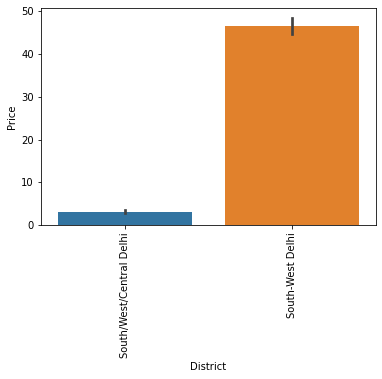

In [23]:
sns.barplot(data=df,y="Price", x="District")
plt.rc('ytick', labelsize=16)
plt.xticks(rotation=90)
plt.show()

#### Inferences : 
* 4 and 5 BHK Floors/Apartments are most priced.
* 1 and 2 BHK Floors/Apartments are least priced.

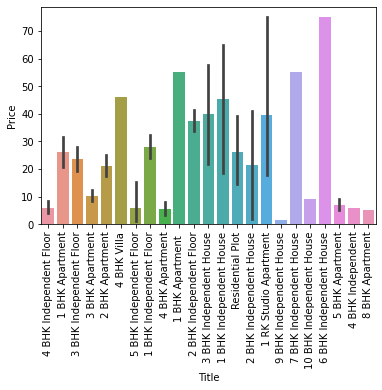

In [26]:
sns.barplot(data=df,y="Price", x="Title")
plt.rc('ytick', labelsize=5)
plt.xticks(rotation=90)
plt.show()

#### Clustered Barplot between Price and District, grouped with Status

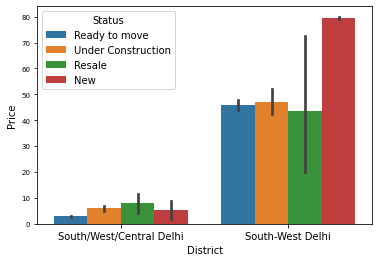

In [65]:
sns.barplot(data=df, x="District", y="Price", hue="Status")
plt.show()

#### Clustered Barplot between Price and Status, grouped with District

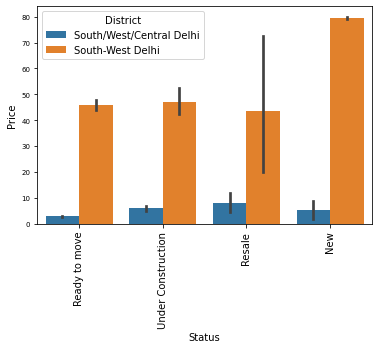

In [66]:
sns.barplot(data=df, x="Status", y="Price", hue="District")
plt.xticks(rotation=90)
plt.show()

### Univariate Analysis
#### Countplots of categorical columns

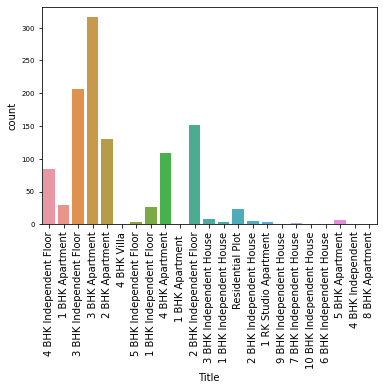

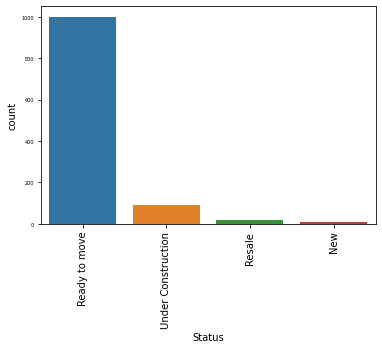

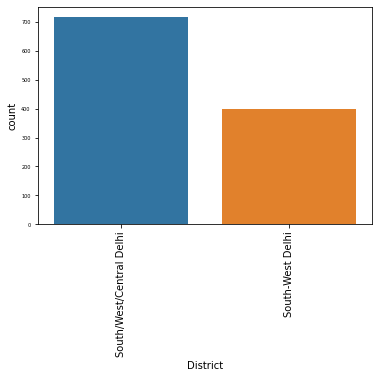

In [67]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.rc('ytick', labelsize=5)
    plt.xticks(rotation=90)
    plt.show()

### Checking for outliers 
* We have outliers on the upper bound.

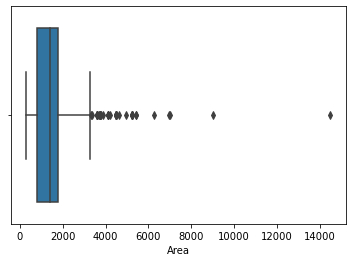

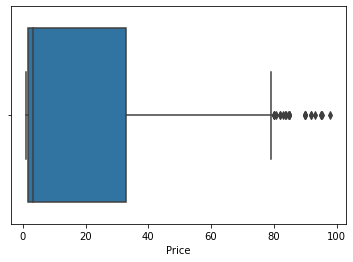

In [68]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

 ### Outliers correction

In [69]:
df.columns

Index(['Title', 'Area', 'Status', 'Price', 'District'], dtype='object')

In [70]:
colsForOutliers=['Area','Price']

In [74]:
def outliers_treatment(x):
    x=x.clip(upper=x.quantile(0.97))
    return x

In [75]:
df[colsForOutliers]=df[colsForOutliers].apply(outliers_treatment)

### Clipped outliers to some extent

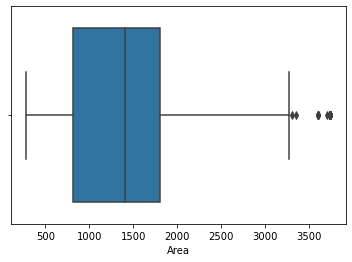

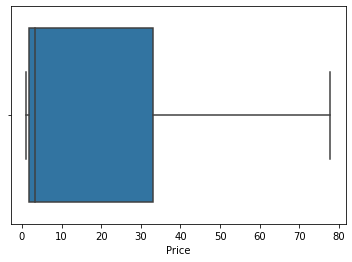

In [76]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

### Label Encoding Title, Status and District columns

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
lb=LabelEncoder()
df["Title"]=lb.fit_transform(df["Title"])

In [79]:
df["Status"]=lb.fit_transform(df["Status"])

In [80]:
df["District"]=lb.fit_transform(df["District"])

In [81]:
df.head(10)

,Title,Area,Status,Price,District
0,14,2925.0,1,8.50,1
1,0,450.0,1,9.50,1
2,10,1620.0,1,2.35,1
3,10,1620.0,1,2.40,1
4,14,2250.0,1,2.35,1
5,14,2250.0,1,2.90,1
6,10,1800.0,1,2.25,1
7,14,2250.0,1,2.70,1
8,9,1800.0,1,1.95,1
9,9,1800.0,1,1.65,1


In [82]:
df["Title"].value_counts()

9     316
10    207
7     152
6     130
12    109
14     84
0      29
2      26
22     23
11      8
16      7
8       5
17      4
3       4
4       3
19      2
1       1
15      1
21      1
5       1
18      1
13      1
20      1
Name: Title, dtype: int64

In [83]:
df["Status"].value_counts()

1    1000
3      93
2      16
0       7
Name: Status, dtype: int64

In [84]:
df["District"].value_counts()

1    717
0    399
Name: District, dtype: int64

In [85]:
df.dtypes

Title         int32
Area        float64
Status        int32
Price       float64
District      int32
dtype: object

In [86]:
x=df.drop("Price",axis=1)
y=df["Price"]
print(x.shape)
print(y.shape)

(1116, 4)
(1116,)


### Splitting Data 

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(837, 4)
(279, 4)
(837,)
(279,)


### StandardScaler 
* Standardising the data so that all the values come on a common scale

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

### Linear Regression Model

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
m1 = LinearRegression()
m1.fit(x_train_sc,y_train)

LinearRegression()

In [92]:
print('Training Score',m1.score(x_train_sc,y_train))
print('Testing Score',m1.score(x_test_sc,y_test))

Training Score 0.7750153690395798
Testing Score 0.7734892493058776


In [93]:
ypred_m1 = m1.predict(x_test_sc)

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

In [97]:
mean_absolute_percentage_error(ypred_m1,y_test)

1.0223352235085768

In [98]:
maem1 = mean_absolute_error(y_test,ypred_m1)
msem1 = mean_squared_error(y_test,ypred_m1)
rmsem1 = np.sqrt(mean_squared_error(y_test,ypred_m1))
r2sm1 = r2_score(y_test,ypred_m1)
print('MAE',maem1)
print('MSE',msem1)
print('RMSE',rmsem1)
print('R2_score',r2sm1)
print('Model_Score',m1.score(x_test_sc,y_test))

MAE 6.449354135794717
MSE 118.2814217336912
RMSE 10.875726262355595
R2_score 0.7734892493058776
Model_Score 0.7734892493058776


In [99]:
res1=pd.DataFrame({"Model":"Linear Regression","R2":r2sm1,"MAE":maem1},index=[0])
res1

,Model,R2,MAE
0,Linear Regression,0.773489,6.449354


### Ridge 

In [100]:
from sklearn.linear_model import Ridge, Lasso

In [109]:
m9 = Ridge(alpha=0.2)
m9.fit(x_train_sc,y_train)

Ridge(alpha=0.2)

In [110]:
print('Training Score',m9.score(x_train_sc,y_train))
print('Testing Score',m9.score(x_test_sc,y_test))

Training Score 0.7750152882622665
Testing Score 0.7734589796549671


In [111]:
ypred_m9 = m9.predict(x_test_sc)
maem9 = mean_absolute_error(y_test,ypred_m9)
msem9 = mean_squared_error(y_test,ypred_m9)
rmsem9 = np.sqrt(mean_squared_error(y_test,ypred_m9))
r2sm9 = r2_score(y_test,ypred_m9)
print('MAE',maem9)
print('MSE',msem9)
print('RMSE',rmsem9)
print('R2_score',r2sm9)
print('Model_Score',m9.score(x_test_sc,y_test))
res9=pd.DataFrame({"Model":"Ridge","R2":r2sm9,"MAE":maem9},index=[8])
res9

MAE 6.450873014255338
MSE 118.2972282123422
RMSE 10.87645292420016
R2_score 0.7734589796549671
Model_Score 0.7734589796549671


,Model,R2,MAE
8,Ridge,0.773459,6.450873


### Lasso 

In [117]:
m10 = Lasso(alpha=0.1)
m10.fit(x_train_sc,y_train)

Lasso(alpha=0.1)

In [118]:
print('Training Score',m10.score(x_train_sc,y_train))
print('Testing Score',m10.score(x_test_sc,y_test))

Training Score 0.7749156322541932
Testing Score 0.7724911324729407


In [119]:
ypred_m10 = m10.predict(x_test_sc)
maem10 = mean_absolute_error(y_test,ypred_m10)
msem10 = mean_squared_error(y_test,ypred_m10)
rmsem10 = np.sqrt(mean_squared_error(y_test,ypred_m10))
r2sm10 = r2_score(y_test,ypred_m10)
print('MAE',maem10)
print('MSE',msem10)
print('RMSE',rmsem10)
print('R2_score',r2sm10)
print('Model_Score',m10.score(x_test_sc,y_test))
res10=pd.DataFrame({"Model":"Lasso","R2":r2sm10,"MAE":maem10},index=[9])
res10

MAE 6.483234950307243
MSE 118.80262736165517
RMSE 10.899661800333769
R2_score 0.7724911324729407
Model_Score 0.7724911324729407


,Model,R2,MAE
9,Lasso,0.772491,6.483235


### SGDRegressor

In [120]:
from sklearn.linear_model import SGDRegressor
m11 = SGDRegressor()  # no_of_iterations = 1000, Learning_rate=0.01
m11.fit(x_train_sc,y_train)

SGDRegressor()

In [121]:
print('Training Score',m11.score(x_train_sc,y_train))
print('Testing Score',m11.score(x_test_sc,y_test))

Training Score 0.7749810924539023
Testing Score 0.773281623450404


In [122]:
ypred_m11 = m11.predict(x_test_sc)
maem11 = mean_absolute_error(y_test,ypred_m11)
msem11 = mean_squared_error(y_test,ypred_m11)
rmsem11 = np.sqrt(mean_squared_error(y_test,ypred_m11))
r2sm11 = r2_score(y_test,ypred_m11)
print('MAE',maem11)
print('MSE',msem11)
print('RMSE',rmsem11)
print('R2_score',r2sm11)
print('Model_Score',m11.score(x_test_sc,y_test))
res11=pd.DataFrame({"Model":"SGDRegressor","R2":r2sm11,"MAE":maem11},index=[10])
res11

MAE 6.4322084553875
MSE 118.38984167092971
RMSE 10.8807096124715
R2_score 0.773281623450404
Model_Score 0.773281623450404


,Model,R2,MAE
10,SGDRegressor,0.773282,6.432208


### Decision Tree

In [123]:
from sklearn import tree
from sklearn.tree import export_text

In [163]:
m2=DecisionTreeRegressor(min_samples_split=15,max_depth=7,random_state=42)
m2.fit(x_train_sc,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=15, random_state=42)

In [164]:
print("Training Score",m2.score(x_train_sc,y_train))
print("Testing Score",m2.score(x_test_sc,y_test))

Training Score 0.8940861292655213
Testing Score 0.8714986793018983


In [165]:
ypred_m2 = m2.predict(x_test_sc)
maem2 = mean_absolute_error(y_test,ypred_m2)
msem2 = mean_squared_error(y_test,ypred_m2)
rmsem2 = np.sqrt(mean_squared_error(y_test,ypred_m2))
r2sm2 = r2_score(y_test,ypred_m2)
print('MAE',maem2)
print('MSE',msem2)
print('RMSE',rmsem2)
print('R2_score',r2sm2)
print('Model_Score',m2.score(x_test_sc,y_test))

MAE 4.163495222645315
MSE 67.10197577930182
RMSE 8.191579565584517
R2_score 0.8714986793018983
Model_Score 0.8714986793018983


In [166]:
res2=pd.DataFrame({"Model":"Decision Tree","R2":r2sm2,"MAE":maem2},index=[1])
res2

,Model,R2,MAE
1,Decision Tree,0.871499,4.163495


### Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
m3=RandomForestRegressor(n_estimators=70,max_depth=10,min_samples_split=14,random_state=42)
m3.fit(x_train_sc,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=14, n_estimators=70,
                      random_state=42)

In [181]:
print("Training Score",m3.score(x_train_sc,y_train))
print("Testing Score",m3.score(x_test_sc,y_test))

Training Score 0.919703963478241
Testing Score 0.9019927204372671


In [182]:
ypred_m3 = m3.predict(x_test_sc)
maem3 = mean_absolute_error(y_test,ypred_m3)
msem3 = mean_squared_error(y_test,ypred_m3)
rmsem3 = np.sqrt(mean_squared_error(y_test,ypred_m3))
r2sm3 = r2_score(y_test,ypred_m3)
print('MAE',maem3)
print('MSE',msem3)
print('RMSE',rmsem3)
print('R2_score',r2sm3)
print('Model_Score',m3.score(x_test_sc,y_test))
res3=pd.DataFrame({"Model":"Random Forest","R2":r2sm3,"MAE":maem3},index=[2])
res3

MAE 3.8347944822792206
MSE 51.1783230217876
RMSE 7.153902642738968
R2_score 0.9019927204372671
Model_Score 0.9019927204372671


,Model,R2,MAE
2,Random Forest,0.901993,3.834794


### RF with GridSearchCV

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
param_grid = {'n_estimators': [60,70,80,100],  
              'max_depth': [7,8,10,15,19], 
              'min_samples_split':[12,15,16,19]}  

In [185]:
RF=RandomForestRegressor(random_state=42)

In [186]:
grid = GridSearchCV(RF, param_grid, verbose = 3,n_jobs=-1)

In [187]:
grid.fit(x_train_sc, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 10, 15, 19],
                         'min_samples_split': [12, 15, 16, 19],
                         'n_estimators': [60, 70, 80, 100]},
             verbose=3)

In [188]:
print(grid.best_params_) 
grid_predictions = grid.predict(x_test_sc) 

{'max_depth': 15, 'min_samples_split': 12, 'n_estimators': 80}


In [201]:
m4=RandomForestRegressor(n_estimators=80,max_depth=15,min_samples_split=12)
m4.fit(x_train_sc,y_train)

RandomForestRegressor(max_depth=15, min_samples_split=12, n_estimators=80)

In [202]:
print("Training Score",m4.score(x_train_sc,y_train))
print("Testing Score",m4.score(x_test_sc,y_test))

Training Score 0.9254197568894499
Testing Score 0.9080014962222646


In [203]:
ypred_m4 = m4.predict(x_test_sc)
maem4 = mean_absolute_error(y_test,ypred_m4)
msem4 = mean_squared_error(y_test,ypred_m4)
rmsem4 = np.sqrt(mean_squared_error(y_test,ypred_m4))
r2sm4 = r2_score(y_test,ypred_m4)
print('MAE',maem4)
print('MSE',msem4)
print('RMSE',rmsem4)
print('R2_score',r2sm4)
print('Model_Score',m4.score(x_test_sc,y_test))
res4=pd.DataFrame({"Model":"RF with GridSearch","R2":r2sm4,"MAE":maem4},index=[3])
res4

MAE 3.743909214088558
MSE 48.040606420917534
RMSE 6.93113312676344
R2_score 0.9080014962222646
Model_Score 0.9080014962222646


,Model,R2,MAE
3,RF with GridSearch,0.908001,3.743909


### XGBOOST

In [204]:
import xgboost
from xgboost import XGBRegressor

In [244]:
m5 = XGBRegressor(objective='reg:squarederror',eval_metric='mape',
                  n_estimators=100,max_depth=6,reg_lambda=0.04,eta=0.09,
                  gamma=0.08, use_label_encoder=False,random_state=42)

In [245]:
m5.fit(x_train_sc,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.09,
             eval_metric='mape', gamma=0.08, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0900000036, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [246]:
print("Training Score",m5.score(x_train_sc,y_train))
print("Testing Score",m5.score(x_test_sc,y_test))

Training Score 0.9531605104070866
Testing Score 0.9107164179256974


In [247]:
ypred_m5 = m5.predict(x_test_sc)
maem5 = mean_absolute_error(y_test,ypred_m5)
msem5 = mean_squared_error(y_test,ypred_m5)
rmsem5 = np.sqrt(mean_squared_error(y_test,ypred_m5))
r2sm5 = r2_score(y_test,ypred_m5)
print('MAE',maem5)
print('MSE',msem5)
print('RMSE',rmsem5)
print('R2_score',r2sm5)
print('Model_Score',m5.score(x_test_sc,y_test))
res5=pd.DataFrame({"Model":"XGBOOST","R2":r2sm5,"MAE":maem5},index=[4])
res5

MAE 3.5256834655850553
MSE 46.62290417944062
RMSE 6.828096673264126
R2_score 0.9107164179256974
Model_Score 0.9107164179256974


,Model,R2,MAE
4,XGBOOST,0.910716,3.525683


### XGB with GridSearchCV

In [248]:
param_grid = {'objective': ['reg:squarederror','reg:squaredlogerror'],  
              'max_depth': [4,5,6,7,8,10,15,19], 
              'reg_lambda':[0.03,0.4,0.5,0.6],
              'gamma': [0.5,0.6,0.03,0.3,0.4],
             'eta': [0.5,0.6,0.03,0.3,0.4],
             'n_estimators': [50,60,70,80,100]}  

In [251]:
xgboost=XGBRegressor(random_state=42)

In [252]:
grid2 = GridSearchCV(xgboost, param_grid, verbose = 3,n_jobs=-1)

In [253]:
grid2.fit(x_train, y_train)

Fitting 5 folds for each of 8000 candidates, totalling 40000 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42,
                                    reg_alpha=N

In [254]:
print(grid2.best_params_) 
grid_predictions2 = grid2.predict(x_test_sc) 

{'eta': 0.03, 'gamma': 0.5, 'max_depth': 7, 'n_estimators': 100, 'objective': 'reg:squarederror', 'reg_lambda': 0.5}


In [329]:
m6 = XGBRegressor(objective='reg:squarederror',eval_metric='mape',
                  n_estimators=100,max_depth=7,reg_lambda=0.5,eta=0.05,
                  gamma=0.5, use_label_encoder=False,random_state=42)

In [330]:
m6.fit(x_train_sc, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.05,
             eval_metric='mape', gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [331]:
print("Training Score",m6.score(x_train_sc,y_train))
print("Testing Score",m6.score(x_test_sc,y_test))

Training Score 0.948448406213718
Testing Score 0.9062683045057104


In [332]:
ypred_m6 = m6.predict(x_test_sc)
maem6 = mean_absolute_error(y_test,ypred_m6)
msem6 = mean_squared_error(y_test,ypred_m6)
rmsem6 = np.sqrt(mean_squared_error(y_test,ypred_m6))
r2sm6 = r2_score(y_test,ypred_m6)
print('MAE',maem6)
print('MSE',msem6)
print('RMSE',rmsem6)
print('R2_score',r2sm6)
print('Model_Score',m6.score(x_test_sc,y_test))
res6=pd.DataFrame({"Model":"XGB with GridSearch","R2":r2sm6,"MAE":maem6},index=[5])
res6

MAE 3.655352187601038
MSE 48.945660065139144
RMSE 6.996117499380578
R2_score 0.9062683045057104
Model_Score 0.9062683045057104


,Model,R2,MAE
5,XGB with GridSearch,0.906268,3.655352


### ADABOOST

In [333]:
from sklearn.ensemble import AdaBoostRegressor

In [408]:
dt1 = DecisionTreeRegressor(max_depth=16,min_samples_split=20,random_state=42)  # decision stump
m7 = AdaBoostRegressor(base_estimator=dt1,n_estimators=100)
m7.fit(x_train_sc, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=16,
                                                       min_samples_split=20,
                                                       random_state=42),
                  n_estimators=100)

In [409]:
print("Training Score",m7.score(x_train_sc,y_train))
print("Testing Score",m7.score(x_test_sc,y_test))

Training Score 0.9280626775911566
Testing Score 0.9026863756048702


In [410]:
ypred_m7 = m7.predict(x_test_sc)
maem7 = mean_absolute_error(y_test,ypred_m7)
msem7 = mean_squared_error(y_test,ypred_m7)
rmsem7 = np.sqrt(mean_squared_error(y_test,ypred_m7))
r2sm7 = r2_score(y_test,ypred_m7)
print('MAE',maem7)
print('MSE',msem7)
print('RMSE',rmsem7)
print('R2_score',r2sm7)
print('Model_Score',m7.score(x_test_sc,y_test))
res7=pd.DataFrame({"Model":"ADABOOST","R2":r2sm7,"MAE":maem7},index=[6])
res7

MAE 3.964927528988111
MSE 50.81610392549482
RMSE 7.128541500580243
R2_score 0.9026863756048702
Model_Score 0.9026863756048702


,Model,R2,MAE
6,ADABOOST,0.902686,3.964928


### ANN

In [411]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [412]:
m8 = Sequential()
m8.add(Dense(units=50,activation='relu',input_dim=4))   # H1 has 50 neurons
m8.add(Dense(units=25,activation='relu'))      # H2 has 25 neurons
m8.add(Dense(units=13,activation='relu'))      # H3 has 13 neurons
m8.add(Dense(units=1,activation='linear'))    # Output layer has 1 neuron

m8.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [413]:
m8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 13)                338       
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,877
Trainable params: 1,877
Non-trainable params: 0
_________________________________________________________________


In [414]:
h1 = m8.fit(x_train_sc,y_train,validation_data=(x_test_sc,y_test),epochs=40)

Epoch 1/40
27/27 [==============================] - 4s 23ms/step - loss: 886.3987 - mae: 18.4857 - val_loss: 753.0792 - val_mae: 15.5242
Epoch 2/40
27/27 [==============================] - 0s 6ms/step - loss: 828.9337 - mae: 17.3167 - val_loss: 674.9072 - val_mae: 13.9601
Epoch 3/40
27/27 [==============================] - 0s 6ms/step - loss: 677.7286 - mae: 15.1956 - val_loss: 485.7670 - val_mae: 12.1691
Epoch 4/40
27/27 [==============================] - 0s 6ms/step - loss: 400.2131 - mae: 11.8757 - val_loss: 243.5635 - val_mae: 9.7230
Epoch 5/40
27/27 [==============================] - 0s 6ms/step - loss: 194.2580 - mae: 9.3784 - val_loss: 174.4109 - val_mae: 8.8370
Epoch 6/40
27/27 [==============================] - 0s 6ms/step - loss: 159.6580 - mae: 8.1645 - val_loss: 153.4462 - val_mae: 7.5891
Epoch 7/40
27/27 [==============================] - 0s 6ms/step - loss: 143.1046 - mae: 7.4579 - val_loss: 140.3955 - val_mae: 6.9655
Epoch 8/40
27/27 [==============================] - 0s

In [415]:
h1.history

{'loss': [886.3987426757812,
  828.9337158203125,
  677.7285766601562,
  400.21307373046875,
  194.25796508789062,
  159.6580047607422,
  143.10462951660156,
  133.3957061767578,
  126.67601776123047,
  122.72582244873047,
  119.36576843261719,
  115.34549713134766,
  112.91560363769531,
  111.22830963134766,
  111.17500305175781,
  108.11685180664062,
  106.52882385253906,
  104.71478271484375,
  103.28776550292969,
  102.28400421142578,
  101.61963653564453,
  100.08589935302734,
  99.90975952148438,
  98.61698913574219,
  97.29499053955078,
  96.02983856201172,
  94.88421630859375,
  93.94482421875,
  93.92475891113281,
  92.70645141601562,
  93.82878875732422,
  91.42745971679688,
  90.79212188720703,
  90.8396224975586,
  89.75275421142578,
  88.65335083007812,
  88.13762664794922,
  88.32708740234375,
  87.14447021484375,
  86.48279571533203],
 'mae': [18.48565101623535,
  17.31667137145996,
  15.195626258850098,
  11.875706672668457,
  9.37836742401123,
  8.164491653442383,
  7.

In [416]:
r8 = pd.DataFrame(h1.history)
r8['Epochs'] = h1.epoch
r8.tail()

,loss,mae,val_loss,val_mae,Epochs
35,88.653351,5.394257,78.712631,4.753119,35
36,88.137627,5.344049,77.871223,4.727900,36
37,88.327087,5.376033,77.185997,4.719796,37
38,87.144470,5.256063,76.050529,4.687542,38
39,86.482796,5.248331,77.548355,4.643634,39


#### Inference: The loss function and MAE for both train and test are decreasing successively with each epoch

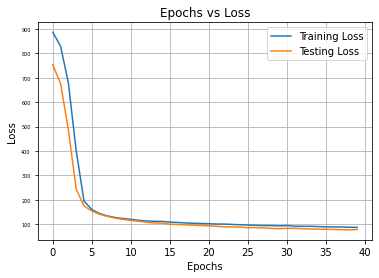

In [417]:
plt.plot(r8['Epochs'],r8['loss'],label='Training Loss')
plt.plot(r8['Epochs'],r8['val_loss'],label='Testing Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

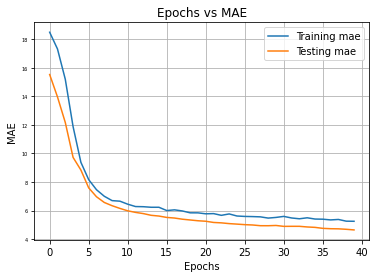

In [418]:
plt.plot(r8['Epochs'],r8['mae'],label='Training mae')
plt.plot(r8['Epochs'],r8['val_mae'],label='Testing mae')
plt.title('Epochs vs MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.grid()
plt.legend()
plt.show()

In [420]:
ypred_m8 = m8.predict(x_test_sc)
maem8 = mean_absolute_error(y_test,ypred_m8)
msem8 = mean_squared_error(y_test,ypred_m8)
rmsem8 = np.sqrt(mean_squared_error(y_test,ypred_m8))
r2sm8 = r2_score(y_test,ypred_m8)
print('MAE',maem8)
print('MSE',msem8)
print('RMSE',rmsem8)
print('R2_score',r2sm8)
res8=pd.DataFrame({"Model":"ANN","R2":r2sm8,"MAE":maem8},index=[7])
res8

MAE 4.643634468885302
MSE 77.54834876486703
RMSE 8.806154028000364
R2_score 0.851493713582779


,Model,R2,MAE
7,ANN,0.851494,4.643634


## Evaluation

### Tabulated Result of 11 Models
#### Conclusion : 
* `We can conclude from the below tabulated result that XGBOOST is the best model as it has the most stable values for R2 and MAE. Hence, it is most suited for House Price Prediction on Makaan.com`

In [423]:
eval_table = pd.concat([res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11])
final_result = eval_table.sort_values(by=['R2'], ascending=False)
final_result

,Model,R2,MAE
4,XGBOOST,0.910716,3.525683
3,RF with GridSearch,0.908001,3.743909
5,XGB with GridSearch,0.906268,3.655352
6,ADABOOST,0.902686,3.964928
2,Random Forest,0.901993,3.834794
1,Decision Tree,0.871499,4.163495
7,ANN,0.851494,4.643634
0,Linear Regression,0.773489,6.449354
8,Ridge,0.773459,6.450873
10,SGDRegressor,0.773282,6.432208
